In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


In [3]:
t_1 = np.loadtxt('clasp_time_matlab.csv',delimiter=',')

In [4]:
#convert t_1 to datetime
t_2 = [dt.datetime.fromordinal(int(t)) + dt.timedelta(days=t%1) - dt.timedelta(days = 366) for t in t_1]


In [8]:
# oldest date in t_2 and ouput in format: 2019-01-01 00:00:00
print(t_2[0])
print(t_2[len(t_2)-1])

# read in concentration data
c_1 = np.loadtxt('clasp_conc.csv',delimiter=',')
#c_2 = np.transpose(c_1)



2019-10-26 04:37:32.299850
2020-09-13 11:58:31.962890


In [16]:
# total concentration, sum alng rows 
c_2 = np.sum(c_1,axis=1)

filter_1 = (~np.isnan(c_2)) & (c_2>0)
c_2 = c_2[filter_1]
t_3 = np.array(t_2)[filter_1]

(9400.0, 10000.0)

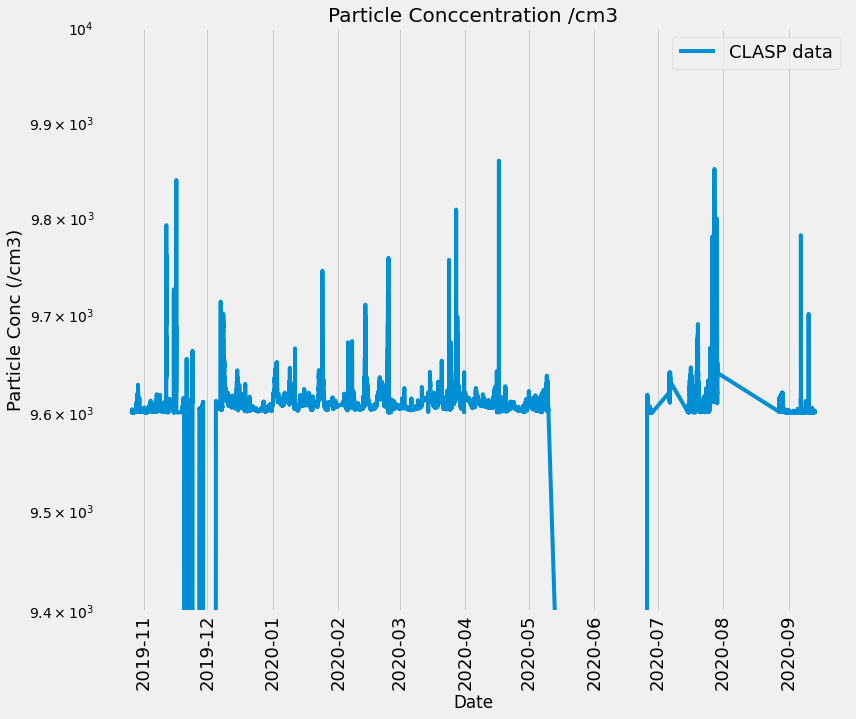

In [28]:
plt.figure(figsize = (12,10))
plt.style.use('fivethirtyeight')

plt.plot(t_3,c_2, label = 'CLASP data')
plt.title('Particle Conccentration /cm3', fontsize = 20)
plt.ylabel('Particle Conc (/cm3)', fontsize = 18)
# rotate xticks to make it vertical 
plt.xticks(rotation=90,fontsize=18)
plt.legend(fontsize = 18)
plt.xlabel('Date')
plt.yscale('log')
plt.ylim(9.4e3,1e4)
plt.grid(True)
